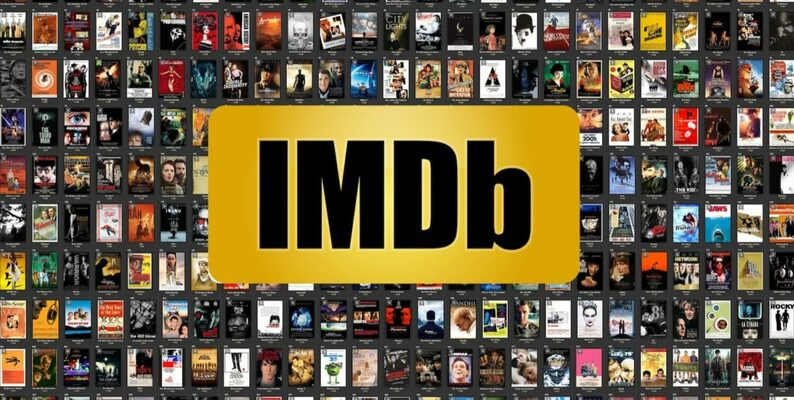

In [50]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/WhatsApp Image 2024-01-19 at 17.53.42_bab1a9ff.jpg",height=400,width=1000))

In [25]:
#import necessory liabraries
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np      # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re  #regular expression used for removing special charecter

In [26]:

# Read the text file into a DataFrame
df = pd.read_csv('/content/train_data.txt', sep=":::", header=None, names=["ID","Title", "Genre", "Description"])
df

<ipython-input-26-d55e9c87e389>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('/content/train_data.txt', sep=":::", header=None, names=["ID","Title", "Genre", "Description"])


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [27]:
df.head()

,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [28]:
df.tail()

,ID,Title,Genre,Description
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54213,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [29]:
df.describe()

,ID
count,54214.000000
mean,27107.500000
std,15650.378084
min,1.000000
25%,13554.250000
50%,27107.500000
75%,40660.750000
max,54214.000000


In [30]:
df.isna().sum()

ID             0
Title          0
Genre          0
Description    0
dtype: int64

In [31]:
df.shape

(54214, 4)

In [33]:
df['Genre'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: Genre, dtype: int64

Axes(0.125,0.11;0.775x0.77)


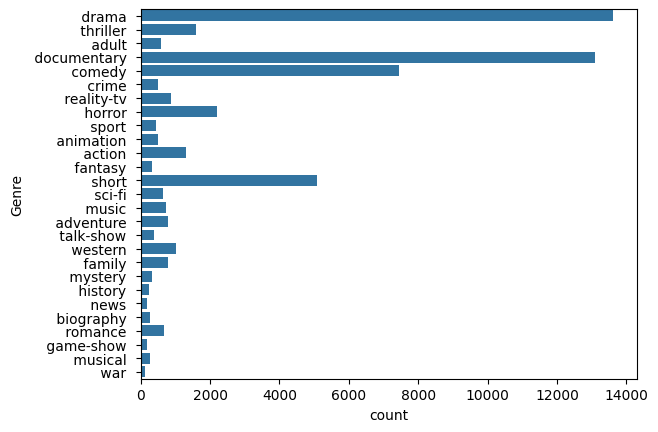

In [43]:
print(sns.countplot(y=df['Genre'],data=df))

In [36]:
df.dtypes

ID              int64
Title          object
Genre          object
Description    object
dtype: object

In [37]:
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download("'omw-1.4'")
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading 'omw-1.4': Package "'omw-1.4'" not found in
[nltk_data]     index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
twitter=df['Description']
twitter

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
2         As the bus empties the students for their fie...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
                               ...                        
54209     This short-lived NBC live sitcom centered on ...
54210     The NEXT Generation of EXPLOITATION. The sist...
54211     Ze bestaan echt, is a stand-up comedy about g...
54212     Walter and Vivian live in the country and hav...
54213     On Labor Day Weekend, 1935, the most intense ...
Name: Description, Length: 54214, dtype: object

In [39]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=twitter.apply(lambda x :tk.tokenize(x)).apply(lambda  x:" ".join(x))
tweets

0        Listening in to a conversation between his doc...
1        A brother and sister with a past incestuous re...
2        As the bus empties the students for their fiel...
3        To help their unemployed father make ends meet...
4        The film's title refers not only to the un-rec...
                               ...                        
54209    This short-lived NBC live sitcom centered on B...
54210    The NEXT Generation of EXPLOITATION . The sist...
54211    Ze bestaan echt , is a stand-up comedy about g...
54212    Walter and Vivian live in the country and have...
54213    On Labor Day Weekend , 1935 , the most intense...
Name: Description, Length: 54214, dtype: object

In [40]:
tweet=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweet

<ipython-input-40-9f75934b3399>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0        Listening in to a conversation between his doc...
1        A brother and sister with a past incestuous re...
2        As the bus empties the students for their fiel...
3        To help their unemployed father make ends meet...
4        The film s title refers not only to the un rec...
                               ...                        
54209    This short lived NBC live sitcom centered on B...
54210    The NEXT Generation of EXPLOITATION The sister...
54211    Ze bestaan echt is a stand up comedy about gro...
54212    Walter and Vivian live in the country and have...
54213    On Labor Day Weekend 1935 the most intense hur...
Name: Description, Length: 54214, dtype: object

In [41]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweet.apply(lambda x :[stemmer.stem(i.lower())for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
tweets

0        listen in to a convers between his doctor and ...
1        a brother and sister with a past incestu relat...
2        as the bus empti the student for their field t...
3        to help their unemploy father make end meet ed...
4        the film s titl refer not onli to the un recov...
                               ...                        
54209    this short live nbc live sitcom center on boni...
54210    the next generat of exploit the sister of kapa...
54211    ze bestaan echt is a stand up comedi about gro...
54212    walter and vivian live in the countri and have...
54213    on labor day weekend 1935 the most intens hurr...
Name: Description, Length: 54214, dtype: object

In [44]:
#step5:- remove stop word
from nltk.corpus import stopwords
stop=stopwords.words('english')
ss=tweets.apply(lambda x :[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x: " ".join(x))
ss

0        listen convers doctor parent 10 year old oscar...
1        brother sister past incestu relationship curre...
2        bus empti student field trip museum natur hist...
3        help unemploy father make end meet edith twin ...
4        film titl refer onli un recov bodi ground zero...
                               ...                        
54209    short live nbc live sitcom center bonino world...
54210    next generat exploit sister kapa bay soror hou...
54211    ze bestaan echt stand comedi grow face fear fr...
54212    walter vivian live countri difficult time keep...
54213    labor day weekend 1935 intens hurrican ever ma...
Name: Description, Length: 54214, dtype: object

In [51]:
#step6:- vectorization(the process of converting data into numerical)

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
train_data=vec.fit_transform(ss)
train_data

<54214x90645 sparse matrix of type '<class 'numpy.float64'>'
	with 2624961 stored elements in Compressed Sparse Row format>

In [52]:
print(train_data)

  (0, 10441)	0.13051680880073382
  (0, 60616)	0.18948706812220112
  (0, 78245)	0.15018603893783428
  (0, 15519)	0.11375673487446489
  (0, 7116)	0.20002880964940534
  (0, 24415)	0.20728824886245295
  (0, 18123)	0.1991553296099889
  (0, 62682)	0.1308728846546701
  (0, 29390)	0.06976767446298963
  (0, 17252)	0.10623690222910841
  (0, 29653)	0.10866510430416049
  (0, 47560)	0.06709005854073014
  (0, 46572)	0.05647618973059349
  (0, 3525)	0.11621666874210376
  (0, 15053)	0.13069416195969114
  (0, 88290)	0.10948709494749939
  (0, 37610)	0.11820454001904863
  (0, 88700)	0.17918057887924918
  (0, 63685)	0.11726388827613728
  (0, 26391)	0.09125485468597797
  (0, 26920)	0.15931343754481786
  (0, 84530)	0.08433490019983277
  (0, 5044)	0.1216687215527991
  (0, 15869)	0.1363081234624529
  (0, 76173)	0.18733253924672483
  :	:
  (54213, 28462)	0.19247241458064504
  (54213, 88136)	0.17481830339871993
  (54213, 86117)	0.15961634532418786
  (54213, 8439)	0.20114044222402575
  (54213, 87397)	0.1706274767

In [53]:
train_data.shape

(54214, 90645)

In [54]:
y=df['Genre'].values
y

array([' drama ', ' thriller ', ' adult ', ..., ' documentary ',
       ' comedy ', ' history '], dtype=object)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data,y,test_size=0.30,random_state=42)
x_train

<37949x90645 sparse matrix of type '<class 'numpy.float64'>'
	with 1836680 stored elements in Compressed Sparse Row format>

In [57]:
x_test

<16265x90645 sparse matrix of type '<class 'numpy.float64'>'
	with 788281 stored elements in Compressed Sparse Row format>

In [58]:
y_train

array([' crime ', ' comedy ', ' drama ', ..., ' drama ', ' drama ',
       ' documentary '], dtype=object)

In [59]:
y_test

array([' comedy ', ' short ', ' comedy ', ..., ' documentary ', ' drama ',
       ' drama '], dtype=object)

In [60]:
from sklearn.naive_bayes import MultinomialNB
navies_model=MultinomialNB()

In [61]:
from sklearn.svm import SVC
svc_model=SVC()

In [62]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [63]:
df['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
model=[navies_model,svc_model,tree_model]
for i in model:
  i.fit(x_train,y_train)
  y_prede=i.predict(x_test)
  result=confusion_matrix(y_test,y_prede)
  score=accuracy_score(y_test,y_prede)
  # # cm=[' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
  #      ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
  #      ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
  #      ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
  #      ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
  #      ' musical ', ' war ']
  # cmd=ConfusionMatrixDisplay(result,display_labels=cm)
  print(y_prede)
  print(result)
  print(score)
  # print(cmd.plot()
  print("*"*100)

[' drama ' ' drama ' ' documentary ' ... ' documentary ' ' drama '
 ' documentary ']
[[   0    0    0    0    0    0    0  100  298    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0   19  135    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0   76  142    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   74   72    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0   63   23    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0   72    0  396 1747    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    1    0   17  146    0    0    0    0    0
   